# Capstone Project - Signal Generation Nyse data 

## Data Anaysis
This notebook is for initial data anaylsis and exploration of the nyse data from yahoo finance

### Import modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats

In [ ]:
#read in the data parse date values 
fullData = pd.read_csv("prices-split-adjusted.csv", parse_dates=['date'])
#search for GOOG symbol data using date as the index
data = fullData[fullData['symbol'] == "GOOG"]

#display the data
data.head()

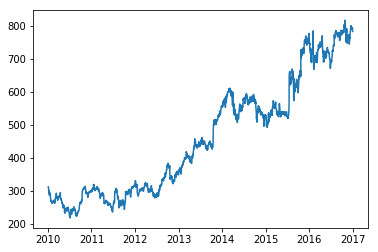

In [51]:
x = data['date']
y = data['open']
plt.plot(x, y)
plt.show()

### Runnning Windows

In [105]:
#read in the data parse date values 
data = pd.read_csv("prices-split-adjusted.csv", parse_dates=['date'])
#search for GOOG symbol data using date as the index
data = data[data['symbol'] == "GOOG"]

from sklearn.model_selection import TimeSeriesSplit
#get the first set of prices as a array
prices=data['close'][:10].values
#set splits to 5
tcsv = TimeSeriesSplit(n_splits=5)
for train_index,test_index in tcsv.split(prices):
    X_train, X_test = prices[train_index], prices[test_index]
    print("TRAIN:",X_train, "TEST:", X_test )
    

TRAIN: [312.20530836 310.83045863 302.99481256 295.94124207 299.88646989] TEST: [299.433161]
TRAIN: [312.20530836 310.83045863 302.99481256 295.94124207 299.88646989
 299.433161  ] TEST: [294.1380165]
TRAIN: [312.20530836 310.83045863 302.99481256 295.94124207 299.88646989
 299.433161   294.1380165 ] TEST: [292.44932364]
TRAIN: [312.20530836 310.83045863 302.99481256 295.94124207 299.88646989
 299.433161   294.1380165  292.44932364] TEST: [293.82417336]
TRAIN: [312.20530836 310.83045863 302.99481256 295.94124207 299.88646989
 299.433161   294.1380165  292.44932364 293.82417336] TEST: [288.9175486]


### Industry Groupings 

In [6]:
#read in the data parse date values 
secData = pd.read_csv("securities.csv")
#display the data
secData.head()

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",2015-08-31,718877


In [47]:
sectors = secData['GICS Sector'].drop_duplicates().tolist()
sectors
#symbolsBySector = pd.DataFrame(index=index, columns=['symbol'])
d = pd.DataFrame()
for x in sectors:
    syms = secData[secData['GICS Sector'] == x]['Ticker symbol'].drop_duplicates().tolist()
    temp = pd.DataFrame({'Sector': x, 'Syms': [syms]})
    d = pd.concat([d, temp])
    
d

,Sector,Syms
0,Industrials,"[MMM, AYI, ALK, ALLE, AAL, AME, ARNC, BA, CHRW..."
0,Health Care,"[ABT, ABBV, AET, A, ALXN, AGN, ABC, AMGN, ANTM..."
0,Information Technology,"[ACN, ATVI, ADBE, AKAM, ADS, GOOGL, GOOG, APH,..."
0,Consumer Discretionary,"[AAP, AMZN, AN, AZO, BBBY, BBY, BWA, KMX, CCL,..."
0,Utilities,"[AES, LNT, AEE, AEP, AWK, CNP, CMS, ED, D, DTE..."
0,Financials,"[AMG, AFL, ALL, AXP, AIG, AMP, AON, AJG, AIZ, ..."
0,Materials,"[APD, ALB, AVY, BLL, CF, DOW, DD, EMN, ECL, FM..."
0,Consumer Staples,"[MO, ADM, BF.B, CPB, CHD, KO, CL, CAG, STZ, CO..."
0,Real Estate,"[AMT, AIV, AVB, BXP, CBG, CCI, DLR, EQIX, EQR,..."
0,Energy,"[APC, APA, BHI, COG, CHK, CVX, XEC, CXO, COP, ..."


In [79]:
for i in list(data.columns.values)[2:]:
    print("VALUE:",i)
    print("mean         :",np.mean(data[i]))
    print("standard dev :",np.std(data[i]))
    print("max          :",np.max(data[i]))
    print("min          :",np.min(data[i]))

VALUE: open
mean         : 459.8065301681602
standard dev : 173.97700623851807
max          : 816.679993
min          : 218.336998328
VALUE: close
mean         : 459.61740876856567
standard dev : 173.89682360538933
max          : 813.1099849999999
min          : 217.221182181
VALUE: low
mean         : 455.6592183485818
standard dev : 172.55262232840414
max          : 805.1400150000001
min          : 216.00572600900003
VALUE: high
mean         : 463.4842814654338
standard dev : 175.18308345523786
max          : 816.679993
min          : 220.314586841
VALUE: volume
mean         : 4051179.398410897
standard dev : 2932428.5058534998
max          : 29760600.0
min          : 7900.0


((array([-3.35667544, -3.10313873, -2.96236403, ...,  2.96236403,
          3.10313873,  3.35667544]),
  array([-0.08377507, -0.08264325, -0.08006722, ...,  0.1298447 ,
          0.13796286,  0.16052431])),
 (0.014768977861367029, 0.000660475744483822, 0.9376580563531031))

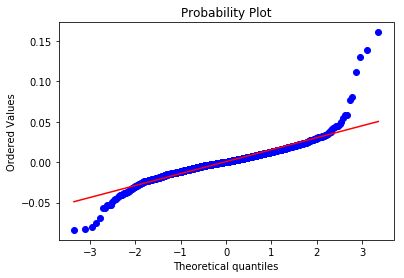

In [216]:
data['pct_chg'] = data['close'].pct_change()[1:]
data.dropna(inplace=True, axis=0)
stats.probplot(data['pct_chg'], dist="norm", plot=pylab)

data['lrets'] = np.log(data['close']/data['close'].shift(1))
data.dropna(inplace=True, axis=0)
stats.probplot(data['lrets'], dist="norm", plot=pylab)

### Pivot

In [94]:
#pivot get all data by symbols 
table = pd.pivot_table(fullData, values='close', index=['date'],
                     columns=['symbol'], aggfunc=np.sum,fill_value=0)
#TODO filling with zero here may want to remove these NaN
table.head()

symbol,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,22.389128,4.77,40.380001,30.572857,0.0,26.629999,26.129884,42.070000,37.090000,31.670000,...,25.379999,69.150002,35.330002,8.63,0.0,17.100000,25.226457,60.020000,13.33,0.0
2010-01-05,22.145923,5.31,40.139999,30.625713,0.0,26.440001,25.918773,42.330002,37.700001,31.620001,...,25.059999,69.419998,34.910000,8.64,0.0,17.230000,25.140187,61.919998,13.80,0.0
2010-01-06,22.067240,5.09,40.490002,30.138571,0.0,26.190001,26.062713,42.779999,37.619999,31.559999,...,24.889999,70.019997,35.139999,8.56,0.0,17.170000,24.960462,61.900002,15.00,0.0
2010-01-07,22.038626,5.24,40.480000,30.082857,0.0,25.770000,26.278623,42.740002,36.889999,31.309999,...,24.639999,69.800003,35.599998,8.60,0.0,16.700001,24.953272,63.320000,16.68,0.0
2010-01-08,22.031474,5.14,40.639999,30.282858,0.0,26.049999,26.412967,42.570000,36.689999,31.490000,...,25.000000,69.519997,35.599998,8.57,0.0,16.700001,24.960462,61.990002,16.41,0.0


In [223]:
from sklearn import preprocessing
x = table.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normtab = pd.DataFrame(x_scaled)
normtab.columns = table.columns.values
normtab.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,...,XLNX,XOM,XRAY,XRX,XYL,YHOO,YUM,ZBH,ZION,ZTS
0,0.106260,0.014876,0.007567,0.029718,0.0,0.009586,0.151094,0.063287,0.163414,0.107641,...,0.055321,0.263125,0.202088,0.296663,0.0,0.145591,0.038127,0.151533,0.000000,0.0
1,0.097916,0.025309,0.006079,0.030219,0.0,0.007469,0.143945,0.066210,0.170336,0.106600,...,0.046891,0.268772,0.190846,0.297899,0.0,0.148740,0.036197,0.173595,0.015359,0.0
2,0.095217,0.021059,0.008250,0.025604,0.0,0.004682,0.148819,0.071268,0.169428,0.105351,...,0.042413,0.281322,0.197002,0.288010,0.0,0.147287,0.032175,0.173363,0.054575,0.0
3,0.094235,0.023957,0.008188,0.025076,0.0,0.000000,0.156130,0.070818,0.161144,0.100146,...,0.035827,0.276720,0.209315,0.292954,0.0,0.135901,0.032014,0.189851,0.109477,0.0
4,0.093990,0.022025,0.009180,0.026971,0.0,0.003121,0.160679,0.068907,0.158874,0.103893,...,0.045311,0.270864,0.209315,0.289246,0.0,0.135901,0.032175,0.174408,0.100654,0.0


In [197]:
x = normtab[0]
d = pd.DataFrame()
for i in range(2, len(x)):
    tmp=pd.DataFrame([x[i-2:i].values])
    d = pd.concat([d,tmp])

d.head()

,0,1
0,0.106260,0.097916
0,0.097916,0.095217
0,0.095217,0.094235
0,0.094235,0.093990
0,0.093990,0.094481


In [207]:
# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
from sklearn.model_selection import train_test_split

# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(d[0], d[1],test_size=0.25, random_state=21)

print(d['0'].shape)

KeyError: '0'

In [199]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model=model.fit(X_train,y_train)
predicted_price = model.predict(X_test)
predicted_train = model.predict(X_train)
print(model.coef_)
print(model.intercept_)

ValueError: Expected 2D array, got 1D array instead:
array=[0.3560813  0.37620448 0.72725555 ... 0.43362899 0.78763667 0.56639259].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

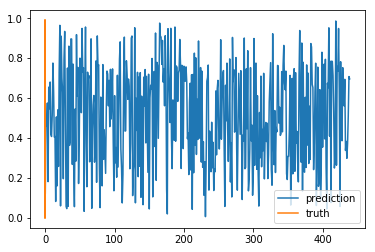

In [190]:
plt.plot(predicted_price, label='prediction')
plt.plot(y_test, label='truth')
plt.legend()
plt.show()

In [188]:
# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test,y_test)

print("score={}".format(score))

score=0.988030062260236


In [193]:
model.predict(X_test[0:1])

array([0.12513957])